In [46]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt


In [47]:
attriutes = [
    'Class',
    'Alcohol',
 	'Malic acid',
 	'Ash',
	'Alcalinity of ash',
 	'Magnesium',
	'Total phenols',
 	'Flavanoids',
 	'Nonflavanoid phenols',
 	'Proanthocyanins',
	'Color intensity',
 	'Hue',
 	'OD280/OD315 of diluted wines',
 	'Proline'
]

In [48]:
df = pd.read_csv('wine.data', names=attriutes)
df.sample(5)

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
159      3    13.48        1.67  2.64               22.5         89   
64       2    12.17        1.45  2.53               19.0        104   
76       2    13.03        0.90  1.71               16.0         86   
169      3    13.40        4.60  2.86               25.0        112   
42       1    13.88        1.89  2.59               15.0        101   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
159           2.60        1.10                  0.52             2.29   
64            1.89        1.75                  0.45             1.03   
76            1.95        2.03                  0.24             1.46   
169           1.98        0.96                  0.27             1.11   
42            3.25        3.56                  0.17             1.70   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
159            11.75  0.57                          1.78      620  
64              2.95  1.45                          2.23      355  
76              4.60  1.19                          2.48      392  
169             8.50  0.67                          1.92      630  
42              5.43  0.88                          3.56     1095

In [49]:
split_generator = KFold(n_splits=5, shuffle=True, random_state=42)

In [50]:
def fit_knn_estimator_with_k(features, labels, k: int):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(features, labels)
    return clf

In [51]:
labels = df.Class
raw_features = df.drop(['Class'], axis=1)
scaled_features = scale(df.drop(['Class'], axis=1))

In [52]:
def get_cross_val_means(features, labels):
    cross_val_means = []

    for current_k in range(1, 51):
        clf = fit_knn_estimator_with_k(features=features, labels=labels, k=current_k)

        cross_val_array = cross_val_score(estimator=clf, X=features, y=labels, cv=split_generator)
        cross_val_mean = cross_val_array.mean()
        cross_val_means.append(cross_val_mean)

    cross_val_means = pd.DataFrame(cross_val_means, index=range(1, 51), columns=['Score'])
    return cross_val_means

In [53]:
def display_means(means, title):

    x_data = means.index.array
    y_data = means.Score

    plt.title(title)
    plt.plot(x_data, y_data)
    plt.xlabel('k')
    plt.ylabel('Score')
    plt.show()

raw_means.idxmax()=Score    1
dtype: int64
raw_means.max()=Score    0.730476
dtype: float64
raw_means[1:].idxmax()=Score    34
dtype: int64
raw_means[1:].max()=Score    0.724603
dtype: float64


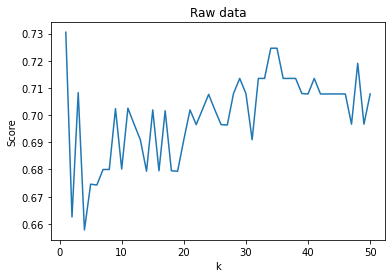

scaled_means.idxmax()=Score    29
dtype: int64
scaled_means.max()=Score    0.977619
dtype: float64


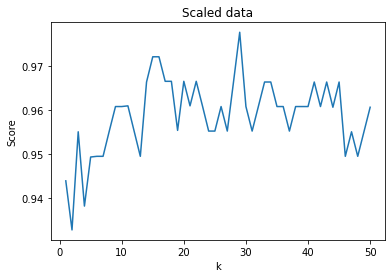

In [55]:
raw_means = get_cross_val_means(raw_features, labels)
print(f'{raw_means.idxmax()=}')
print(f'{raw_means.max()=}')
print(f'{raw_means[1:].idxmax()=}')
print(f'{raw_means[1:].max()=}')
display_means(raw_means, 'Raw data')

scaled_means = get_cross_val_means(scaled_features, labels)
print(f'{scaled_means.idxmax()=}')
print(f'{scaled_means.max()=}')
display_means(scaled_means, 'Scaled data')